In [1]:
import pandas as pd
from pathlib import Path
import numpy  as np
from sklearn.model_selection import train_test_split

In [6]:
from pandas_ods_reader import read_ods
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectFromModel

In [7]:
this_dir = Path.cwd()

In [4]:
dataset_file = this_dir / "pd_speech_features.ods"

In [5]:
df = pd.read_excel(dataset_file, header=[0, 1], engine="odf")

In [9]:
df.drop(columns=['Basic Info'], inplace=True)

/home/sahitya/.local/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
def normalize_data(x):
    return((x-np.min(x))/max(x)-min(x))

In [11]:
data = df.to_numpy(dtype=np.float32)
features, labels = data[:, :-1], data[:, -1]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=0)

In [13]:
#using ridge Regularization\
df.head()

Baseline Features                                               \
                PPE      DFA     RPDE numPulses numPeriodsPulses   
0           0.85247  0.71826  0.57227       240              239   
1           0.76686  0.69481  0.53966       234              233   
2           0.85083  0.67604  0.58982       232              231   
3           0.41121  0.79672  0.59257       178              177   
4           0.32790  0.79782  0.53028       236              235   

                                                                           \
  meanPeriodPulses stdDevPeriodPulses locPctJitter locAbsJitter rapJitter   
0         0.008064           0.000087      0.00218     0.000018   0.00067   
1         0.008258           0.000073      0.00195     0.000016   0.00052   
2         0.008340           0.000060      0.00176     0.000015   0.00057   
3         0.010858           0.000183      0.00419     0.000046   0.00149   
4         0.008162           0.002669      0.00535     0.000044   0.00166   

   ...             TQWT Features                            \
   ... tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0  ...                    1.5620                    2.6445   
1  ...                    1.5589                    3.6107   
2  ...                    1.5643                    2.3308   
3  ...                    3.7805                    3.5664   
4  ...                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 753 columns]

In [14]:
y_train.shape,x_train.shape

((529,), (529, 752))

In [15]:
import statsmodels.api as sm

logml=sm.GLM(y_train,(sm.add_constant(x_train))),family=sm.families.Bionomial())

In [16]:
logml=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())

logml.fit().summary()

/home/sahitya/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/sahitya/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
/home/sahitya/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  529
Model:                            GLM   Df Residuals:                       68
Model Family:                Binomial   Df Model:                          460
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 26 May 2021   Deviance:                       0.0000
Time:                        18:52:28   Pearson chi2:                     0.00
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.15e+15   2.17e+07  -5.29e+07      0.000   -1.15e+15   -1.15e+15
x1          2.035e+15   3.02e+08   6.74e+06      0.000    2.03e+15    2.03e+15
x2         -8.547e+15   1.01e+09  -8.43e+06      0.000   -8.55e+15   -8.55e+15
x3         -2.735e+15   3.15e+08  -8.67e+06      0.000   -2.73e+15   -2.73e+15
x4          4.972e+14    3.5e+07   1.42e+07      0.000    4.97e+14    4.97e+14
x5         -4.702e+14   3.49e+07  -1.35e+07      0.000    -4.7e+14    -4.7e+14
x6          3.198e+16   1.22e+09   2.62e+07      0.000     3.2e+16     3.2e+16
x7          1.711e+16   1.45e+09   1.18e+07      0.000    1.71e+16    1.71e+16
x8           1.19e+16   2.05e+09    5.8e+06      0.000    1.19e+16    1.19e+16
x9          4.735e+13   1.48e+07    3.2e+06      0.000    4.73e+13    4.73e+13
x10         7.246e+15   8.92e+08   8.13e+06      0.000    7.25e+15    7.25e+15
x11         3.998e+16   1.08e+09   3.71e+07      0.000       4e+16       4e+16
x12         1.929e+16   2.69e+09   7.16e+06      0.000    1.93e+16    1.93e+16
x13         3.811e+16    3.1e+09   1.23e+07      0.000    3.81e+16    3.81e+16
x14         2.479e+15   4.36e+08   5.68e+06      0.000    2.48e+15    2.48e+15
x15        -5.107e+15   5.26e+08  -9.71e+06      0.000   -5.11e+15   -5.11e+15
x16        -1.437e+17   3.46e+09  -4.16e+07      0.000   -1.44e+17   -1.44e+17
x17          5.05e+16   1.54e+09   3.28e+07      0.000    5.05e+16    5.05e+16
x18        -1.567e+16   1.59e+09  -9.88e+06      0.000   -1.57e+16   -1.57e+16
x19         1.022e+17   3.02e+09   3.38e+07      0.000    1.02e+17    1.02e+17
x20         5.984e+16   1.76e+09    3.4e+07      0.000    5.98e+16    5.98e+16
x21        -6.374e+14   1.01e+07  -6.34e+07      0.000   -6.37e+14   -6.37e+14
x22        -1.364e+15   2.27e+07  -6.01e+07      0.000   -1.36e+15   -1.36e+15
x23        -4.918e+14   3.16e+07  -1.55e+07      0.000   -4.92e+14   -4.92e+14
x24         1.987e+15    3.4e+07   5.85e+07      0.000    1.99e+15    1.99e+15
x25         9.556e+12   3.25e+05   2.94e+07      0.000    9.56e+12    9.56e+12
x26         1.042e+13   2.51e+05   4.16e+07      0.000    1.04e+13    1.04e+13
x27         1.028e+12    7.2e+04   1.43e+07      0.000    1.03e+12    1.03e+12
x28        -4.341e+12   7.39e+04  -5.88e+07      0.000   -4.34e+12   -4.34e+12
x29         1.654e+12   6.87e+04   2.41e+07      0.000    1.65e+12    1.65e+12
x30        -7.955e+11   2.99e+04  -2.66e+07      0.000   -7.95e+11   -7.95e+11
x31        -3.637e+11   1.78e+04  -2.04e+07      0.000   -3.64e+11   -3.64e+11
x32        -4.253e+11   2.06e+04  -2.06e+07      0.000   -4.25e+11   -4.25e+11
x33        -5.654e+14   2.38e+08  -2.38e+06      0.000   -5.65e+14   -5.65e+14
x34          2.17e+13      9e+05   2.41e+07      0.000    2.17e+13    2.17e+13
x35        -1.666e+14   6.26e+06  -2.66e+07      0.000   -1.67e+14   -1.67e+14
x3

In [17]:
df.head()

Baseline Features                                               \
                PPE      DFA     RPDE numPulses numPeriodsPulses   
0           0.85247  0.71826  0.57227       240              239   
1           0.76686  0.69481  0.53966       234              233   
2           0.85083  0.67604  0.58982       232              231   
3           0.41121  0.79672  0.59257       178              177   
4           0.32790  0.79782  0.53028       236              235   

                                                                           \
  meanPeriodPulses stdDevPeriodPulses locPctJitter locAbsJitter rapJitter   
0         0.008064           0.000087      0.00218     0.000018   0.00067   
1         0.008258           0.000073      0.00195     0.000016   0.00052   
2         0.008340           0.000060      0.00176     0.000015   0.00057   
3         0.010858           0.000183      0.00419     0.000046   0.00149   
4         0.008162           0.002669      0.00535     0.000044   0.00166   

   ...             TQWT Features                            \
   ... tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0  ...                    1.5620                    2.6445   
1  ...                    1.5589                    3.6107   
2  ...                    1.5643                    2.3308   
3  ...                    3.7805                    3.5664   
4  ...                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 753 columns]

In [18]:
df1_exp=df

<AxesSubplot:>

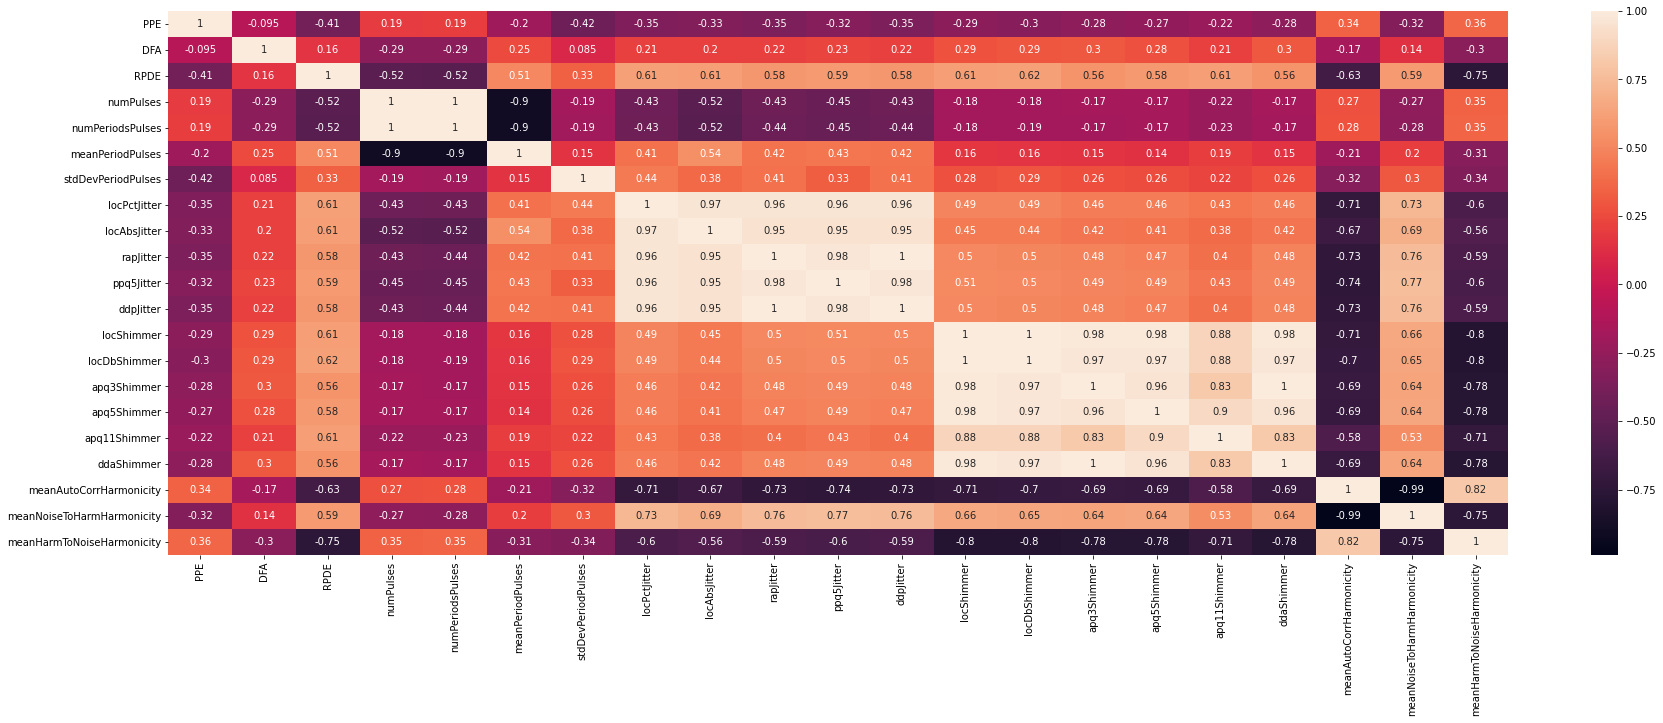

In [19]:
plt.figure(figsize=(30,10))
sns.heatmap(df1_exp["Baseline Features"].corr(),annot=True)

In [20]:
round(df1_exp['Baseline Features'].corr(),3)

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
PPE,1.000,-0.095,-0.406,0.192,0.194,-0.202,-0.424,-0.349,-0.331,-0.353,...,-0.353,-0.291,-0.305,-0.277,-0.266,-0.222,-0.277,0.343,-0.322,0.356
DFA,-0.095,1.000,0.155,-0.287,-0.287,0.254,0.085,0.212,0.201,0.216,...,0.215,0.285,0.295,0.302,0.276,0.208,0.302,-0.168,0.143,-0.301
RPDE,-0.406,0.155,1.000,-0.521,-0.525,0.507,0.334,0.614,0.609,0.577,...,0.577,0.610,0.616,0.563,0.585,0.608,0.563,-0.634,0.589,-0.755
numPulses,0.192,-0.287,-0.521,1.000,1.000,-0.897,-0.187,-0.426,-0.517,-0.432,...,-0.432,-0.180,-0.181,-0.169,-0.165,-0.222,-0.169,0.273,-0.271,0.346
numPeriodsPulses,0.194,-0.287,-0.525,1.000,1.000,-0.897,-0.192,-0.433,-0.523,-0.440,...,-0.439,-0.185,-0.185,-0.173,-0.169,-0.226,-0.173,0.281,-0.279,0.350
meanPeriodPulses,-0.202,0.254,0.507,-0.897,-0.897,1.000,0.150,0.406,0.540,0.417,...,0.417,0.163,0.161,0.150,0.144,0.194,0.150,-0.211,0.196,-0.311
stdDevPeriodPulses,-0.424,0.085,0.334,-0.187,-0.192,0.150,1.000,0.441,0.375,0.407,...,0.407,0.275,0.288,0.262,0.261,0.225,0.262,-0.317,0.304,-0.336
locPctJitter,-0.349,0.212,0.614,-0.426,-0.433,0.406,0.441,1.000,0.967,0.962,...,0.962,0.494,0.488,0.459,0.460,0.427,0.459,-0.713,0.733,-0.598
locAbsJitter,-0.331,0.201,0.609,-0.517,-0.523,0.540,0.375,0.967,1.000,0.952,...,0.952,0.447,0.441,0.418,0.412,0.380,0.418,-0.671,0.690,-0.562
rapJitter,-0.353,0.216,0.577,-0.432,-0.440,0.417,0.407,0.962,0.952,1.000,...,1.000,0.503,0.496,0.481,0.467,0.400,0.481,-0.730,0.757,-0.587


In [21]:
form_data=pd.read_csv("pd_speech_features2.csv")

In [22]:
form_data.drop(['id','gender'],axis=1)

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,0.00008,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
751,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,0.00016,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
752,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,0.00011,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
753,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,0.00017,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [23]:
form_data.drop(columns=['locAbsJitter','rapJitter','ddpJitter','ppq5Jitter','locShimmer','apq5Shimmer','meanNoiseToHarmHarmonicity','numPeriodsPulses','meanPeriodPulses','apq11Shimmer'],axis=1)

,id,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locDbShimmer,apq3Shimmer,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.000087,0.00218,0.517,0.03011,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.000073,0.00195,0.502,0.02320,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.000060,0.00176,0.897,0.05094,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.000183,0.00419,0.527,0.02395,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.002669,0.00535,0.497,0.02909,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,250,0,0.80903,0.56355,0.28385,417,0.000052,0.00064,0.171,0.01068,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
751,250,0,0.16084,0.56499,0.59194,415,0.000220,0.00143,0.482,0.02307,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
752,251,0,0.88389,0.72335,0.46815,381,0.000103,0.00076,0.263,0.01597,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
753,251,0,0.83782,0.74890,0.49823,340,0.000055,0.00092,0.311,0.01791,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [24]:
form_data.drop(columns=['GQ_std_cycle_closed','tqwt_medianValue_dec_5','tqwt_medianValue_dec_16','tqwt_medianValue_dec_16','tqwt_medianValue_dec_20',
                        'tqwt_medianValue_dec_24','tqwt_medianValue_dec_25','tqwt_meanValue_dec_5','tqwt_meanValue_dec_5'
                        ,'tqwt_meanValue_dec_30','tqwt_meanValue_dec_35','tqwt_meanValue_dec_23','tqwt_meanValue_dec_27',
                        'tqwt_meanValue_dec_31',
                        'tqwt_meanValue_dec_16','tqwt_meanValue_dec_11'])

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
751,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
752,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
753,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


<AxesSubplot:>

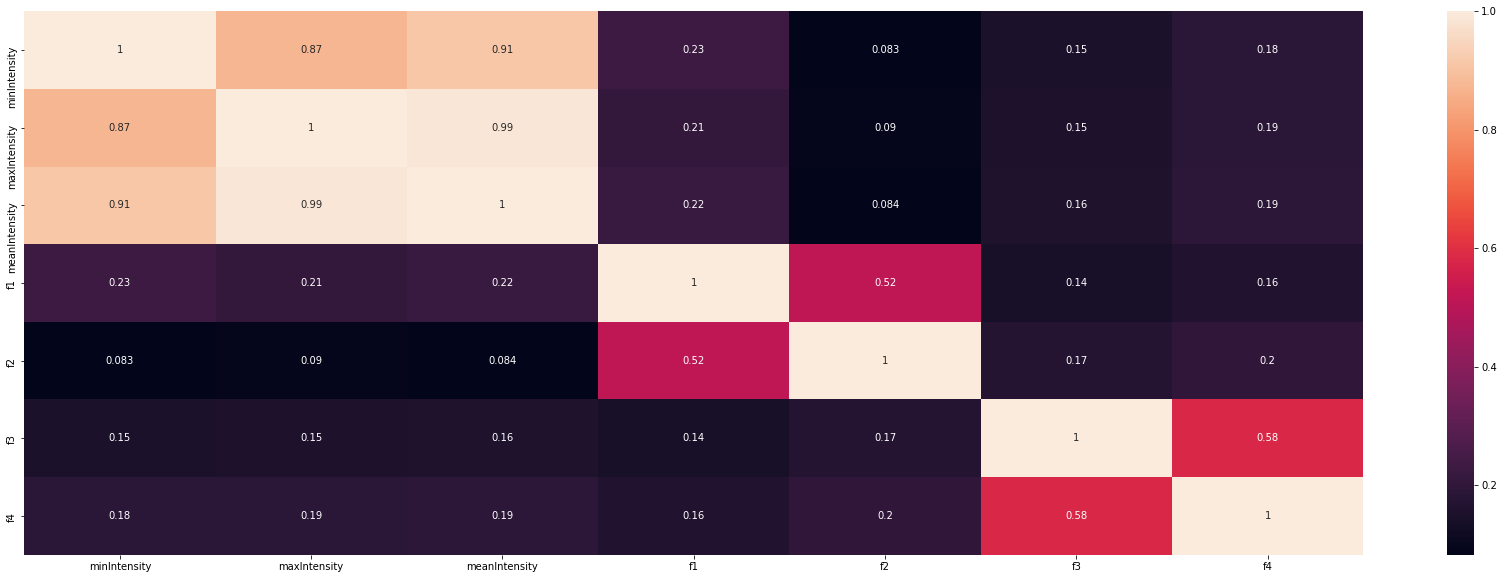

In [26]:
plt.figure(figsize=(30,10))
sns.heatmap(df1_exp["Intensity Parameters"].corr(),annot=True)

In [27]:
def normalize_data(x):
    return((x-np.min(x))/max(x)-min(x))

In [28]:
form_data.apply(normalize_data)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.000000,1.0,0.851866,-0.338537,0.325447,-1.737596,-0.737017,0.457297,0.021870,0.070781,...,-1.509582,-1.526227,-1.564094,-1.723099,-1.750555,-1.590162,-1.849468,-1.937749,-2.258028,1.0
1,0.000000,1.0,0.757547,-0.366039,0.288017,-1.744212,-0.743646,0.472316,0.017936,0.062493,...,-1.509595,-1.521474,-1.402448,-1.625398,-1.681560,-1.521543,-1.786502,-1.879660,-2.090295,1.0
2,0.000000,1.0,0.850059,-0.388053,0.345591,-1.746417,-0.745856,0.478589,0.014289,0.055646,...,-1.509573,-1.527770,-1.517795,-1.659157,-1.681658,-1.585482,-1.844634,-1.935158,-2.348640,1.0
3,0.003984,0.0,0.365715,-0.246517,0.348747,-1.805954,-0.805525,0.672807,0.049419,0.143213,...,-1.500330,-1.521692,-1.552681,-1.626924,-1.761056,-1.587126,-1.813572,-1.881017,-2.353156,1.0
4,0.003984,0.0,0.273929,-0.245226,0.277251,-1.742007,-0.741436,0.464859,0.763302,0.185015,...,-1.490354,-1.510501,-1.545896,-1.707918,-1.719475,-1.491884,-1.759315,-1.902028,-2.340011,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.996016,0.0,0.804007,-0.519985,-0.005602,-1.542448,-0.541436,0.192242,0.011935,0.015285,...,-1.503291,-1.524385,-1.570244,-1.739912,-1.768525,-1.602707,-1.837206,-1.934275,-2.335212,0.0
751,0.996016,0.0,0.089874,-0.518296,0.348024,-1.544653,-0.544751,0.186285,0.060116,0.043754,...,-1.507879,-1.530650,-1.580886,-1.739858,-1.748498,-1.592894,-1.790055,-1.800369,-2.197446,0.0
752,1.000000,0.0,0.886483,-0.332567,0.205938,-1.582139,-0.581215,0.226358,0.026422,0.019610,...,-1.301071,-1.320534,-1.380702,-1.702581,-1.776989,-1.616360,-1.834671,-1.931595,-2.346877,0.0
753,1.000000,0.0,0.835726,-0.302601,0.240464,-1.627343,-0.626519,0.273386,0.012767,0.025376,...,-1.436190,-1.476123,-1.522341,-1.742727,-1.787629,-1.624107,-1.848502,-1.940654,-2.355375,0.0


In [29]:
data = form_data.to_numpy(dtype=np.float32)
features, labels = data[:, :-1], data[:, -1]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=0)
x_train.shape,y_train.shape

((528, 754), (528,))

In [31]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1)#tolerence is 0.1
clf.fit(x_train,y_train) 

/home/sahitya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [32]:
y_pred=clf.predict(x_test)

In [33]:
a=cross_val_score(clf,x_train,y_train,cv=2,scoring="accuracy")#cross_validation

/home/sahitya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sahitya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [34]:
a.mean()*100

75.37878787878788

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.17      0.27        59
         1.0       0.77      0.97      0.86       168

    accuracy                           0.76       227
   macro avg       0.72      0.57      0.56       227
weighted avg       0.74      0.76      0.71       227



In [36]:
print(f"confusion_matrix:\n{confusion_matrix(y_test,y_pred)}")


confusion_matrix:
[[ 10  49]
 [  5 163]]


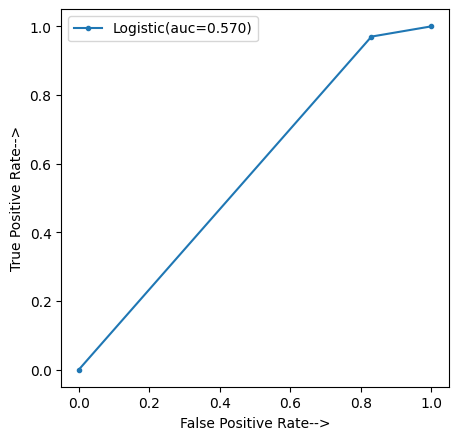

In [37]:
logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred)
auc_logistic=auc(logistic_fpr,logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,marker=".",label="Logistic(auc=%0.3f)"%auc_logistic)
plt.xlabel("False Positive Rate-->")
plt.ylabel("True Positive Rate-->")
plt.legend()
plt.show()